In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("/content/driver-data.csv")
data

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [ ]:
x = data.iloc[:,[1,2]].values
x

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

In [ ]:
from sklearn.cluster import KMeans
# elbow method
wcss = []
for i in range(1,11):                                 #number of clusters
    kmeans = KMeans(n_clusters=i, init = "k-means++") #init-generates centroids in the dataset based on the density
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print (wcss)      

[12184626.129627975, 1316420.8509477186, 992634.060670247, 719601.5383469037, 534638.8908184208, 372841.1452327002, 319816.2199342041, 276964.8781593557, 252672.13207803702, 230078.80615292286]


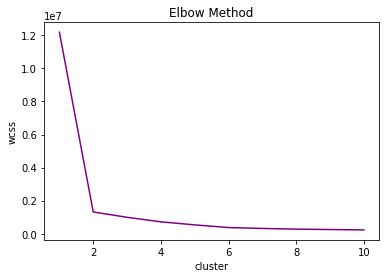

In [ ]:
plt.plot(range(1,11),wcss, c='purple')
plt.xlabel("cluster")
plt.ylabel("wcss")
plt.title('Elbow Method')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++')
y_kmeans = kmeans.fit_predict(x)
kmeans.cluster_centers_


array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [ ]:
print (y_kmeans)
print (len(y_kmeans))


[0 0 0 ... 1 1 1]
4000


In [ ]:
print (type(y_kmeans))
unique, counts = np.unique(y_kmeans,return_counts=True)
print (dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


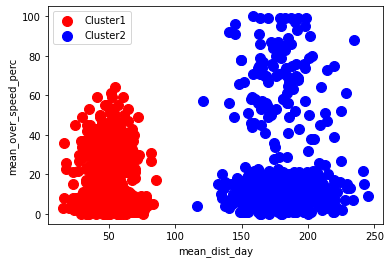

In [ ]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.legend()
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.show()


In [ ]:
clust = pd.DataFrame(y_kmeans)
clust.columns = ['Cluster']
pd.concat([data,clust],axis=1)

,id,mean_dist_day,mean_over_speed_perc,Cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')     #creating cluster
y_hc = hc.fit_predict(x)

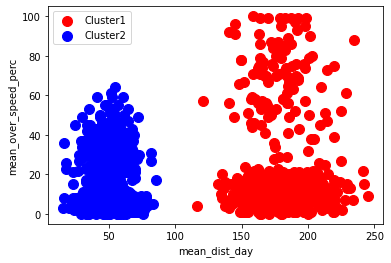

In [ ]:
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], c='red', s=100, label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], c='blue', s=100, label='Cluster2')
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.legend()
plt.show()